In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

In [5]:
df_covid = pd.read_csv('./Covid_clean.csv')

In [6]:
#dropeamos lo que no me sirve como final clasification

df_covid.drop(['USMER', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'DATE_DIED'], axis=1, inplace=True)

In [7]:
# creamos el modelo de clasificacion

X = df_covid.drop('fallecidos', axis=1)
y = df_covid['fallecidos']



In [11]:
# dividimos el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [14]:
# entrenamos el modelo

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [15]:

# predecimos

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9307543690173005


In [17]:
# vemos la importancia de las variables

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

                importance
feature                   
PATIENT_TYPE         0.347
AGE                  0.329
PNEUMONIA            0.193
DIABETES             0.031
HIPERTENSION         0.022
SEX                  0.013
RENAL_CHRONIC        0.012
OBESITY              0.010
COPD                 0.008
OTHER_DISEASE        0.008
CARDIOVASCULAR       0.008
TOBACCO              0.008
INMSUPR              0.007
ASTHMA               0.005


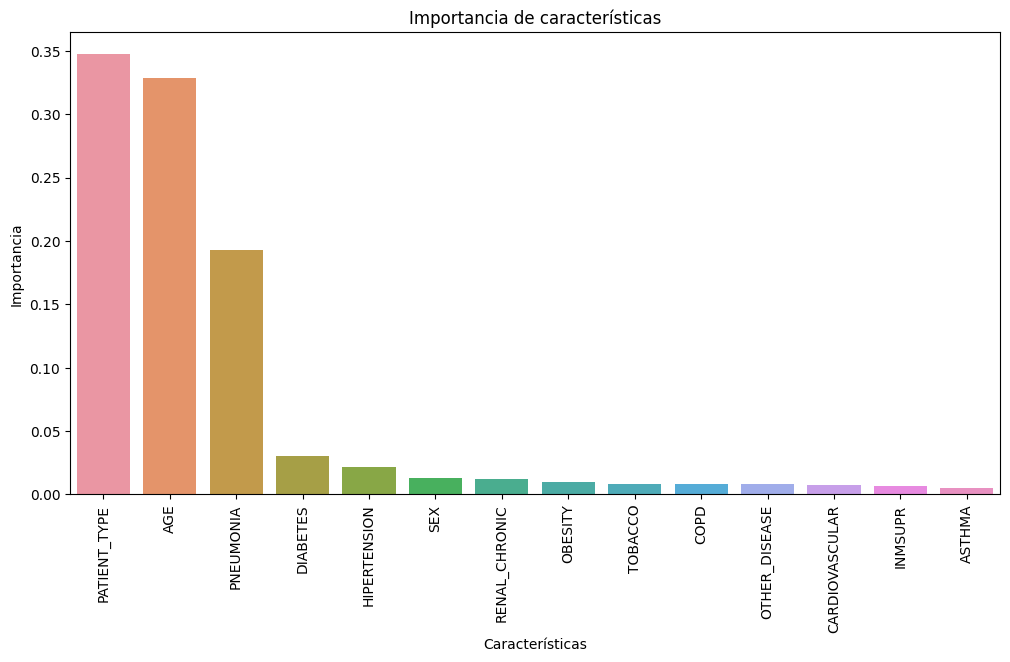

In [19]:
# Obtener los valores de importancia de características y sus nombres

feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Crear un dataframe con los valores de importancia de características y sus nombres

feature_importances_df = pd.DataFrame({'feature_importances': feature_importances,
                                        'feature_names': feature_names})

# Ordenar los valores de importancia de características de mayor a menor

feature_importances_df.sort_values('feature_importances', ascending=False, inplace=True)

# Crear un gráfico de barras con los valores de importancia de características

plt.figure(figsize=(12, 6))

sns.barplot(x=feature_importances_df.feature_names, y=feature_importances_df.feature_importances)

plt.title('Importancia de características')

plt.xlabel('Características')

plt.ylabel('Importancia')

plt.xticks(rotation=90)

plt.show()

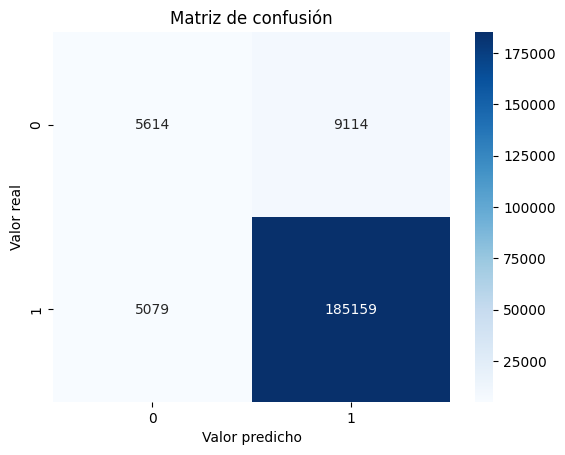

In [20]:
#creamos matriz de confusion

cm = confusion_matrix(y_test, y_pred)

#creamos el heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de confusión')

plt.xlabel('Valor predicho')

plt.ylabel('Valor real')

plt.show()